In [15]:
import statsmodels.tsa.seasonal as seasonal
def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'Date', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

## Deaths

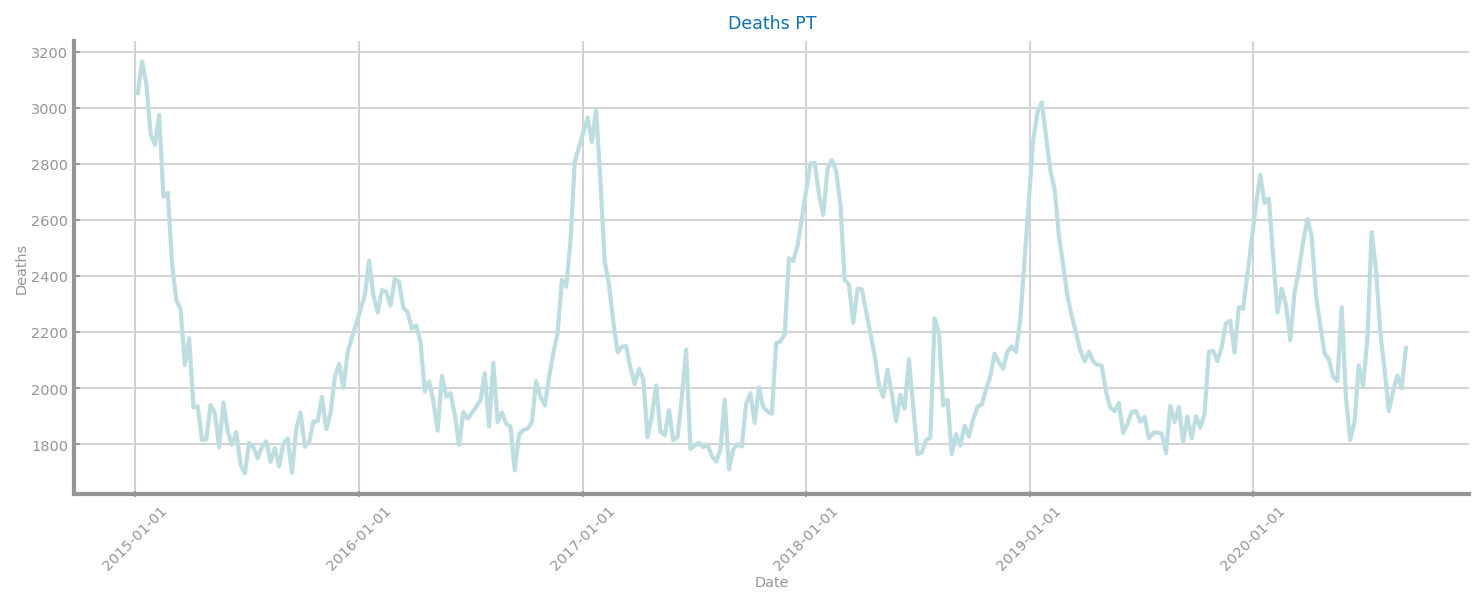

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds

data = pd.read_csv('data/deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, dayfirst=True)
x_label='Date'
y_label='Deaths'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='Deaths PT')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

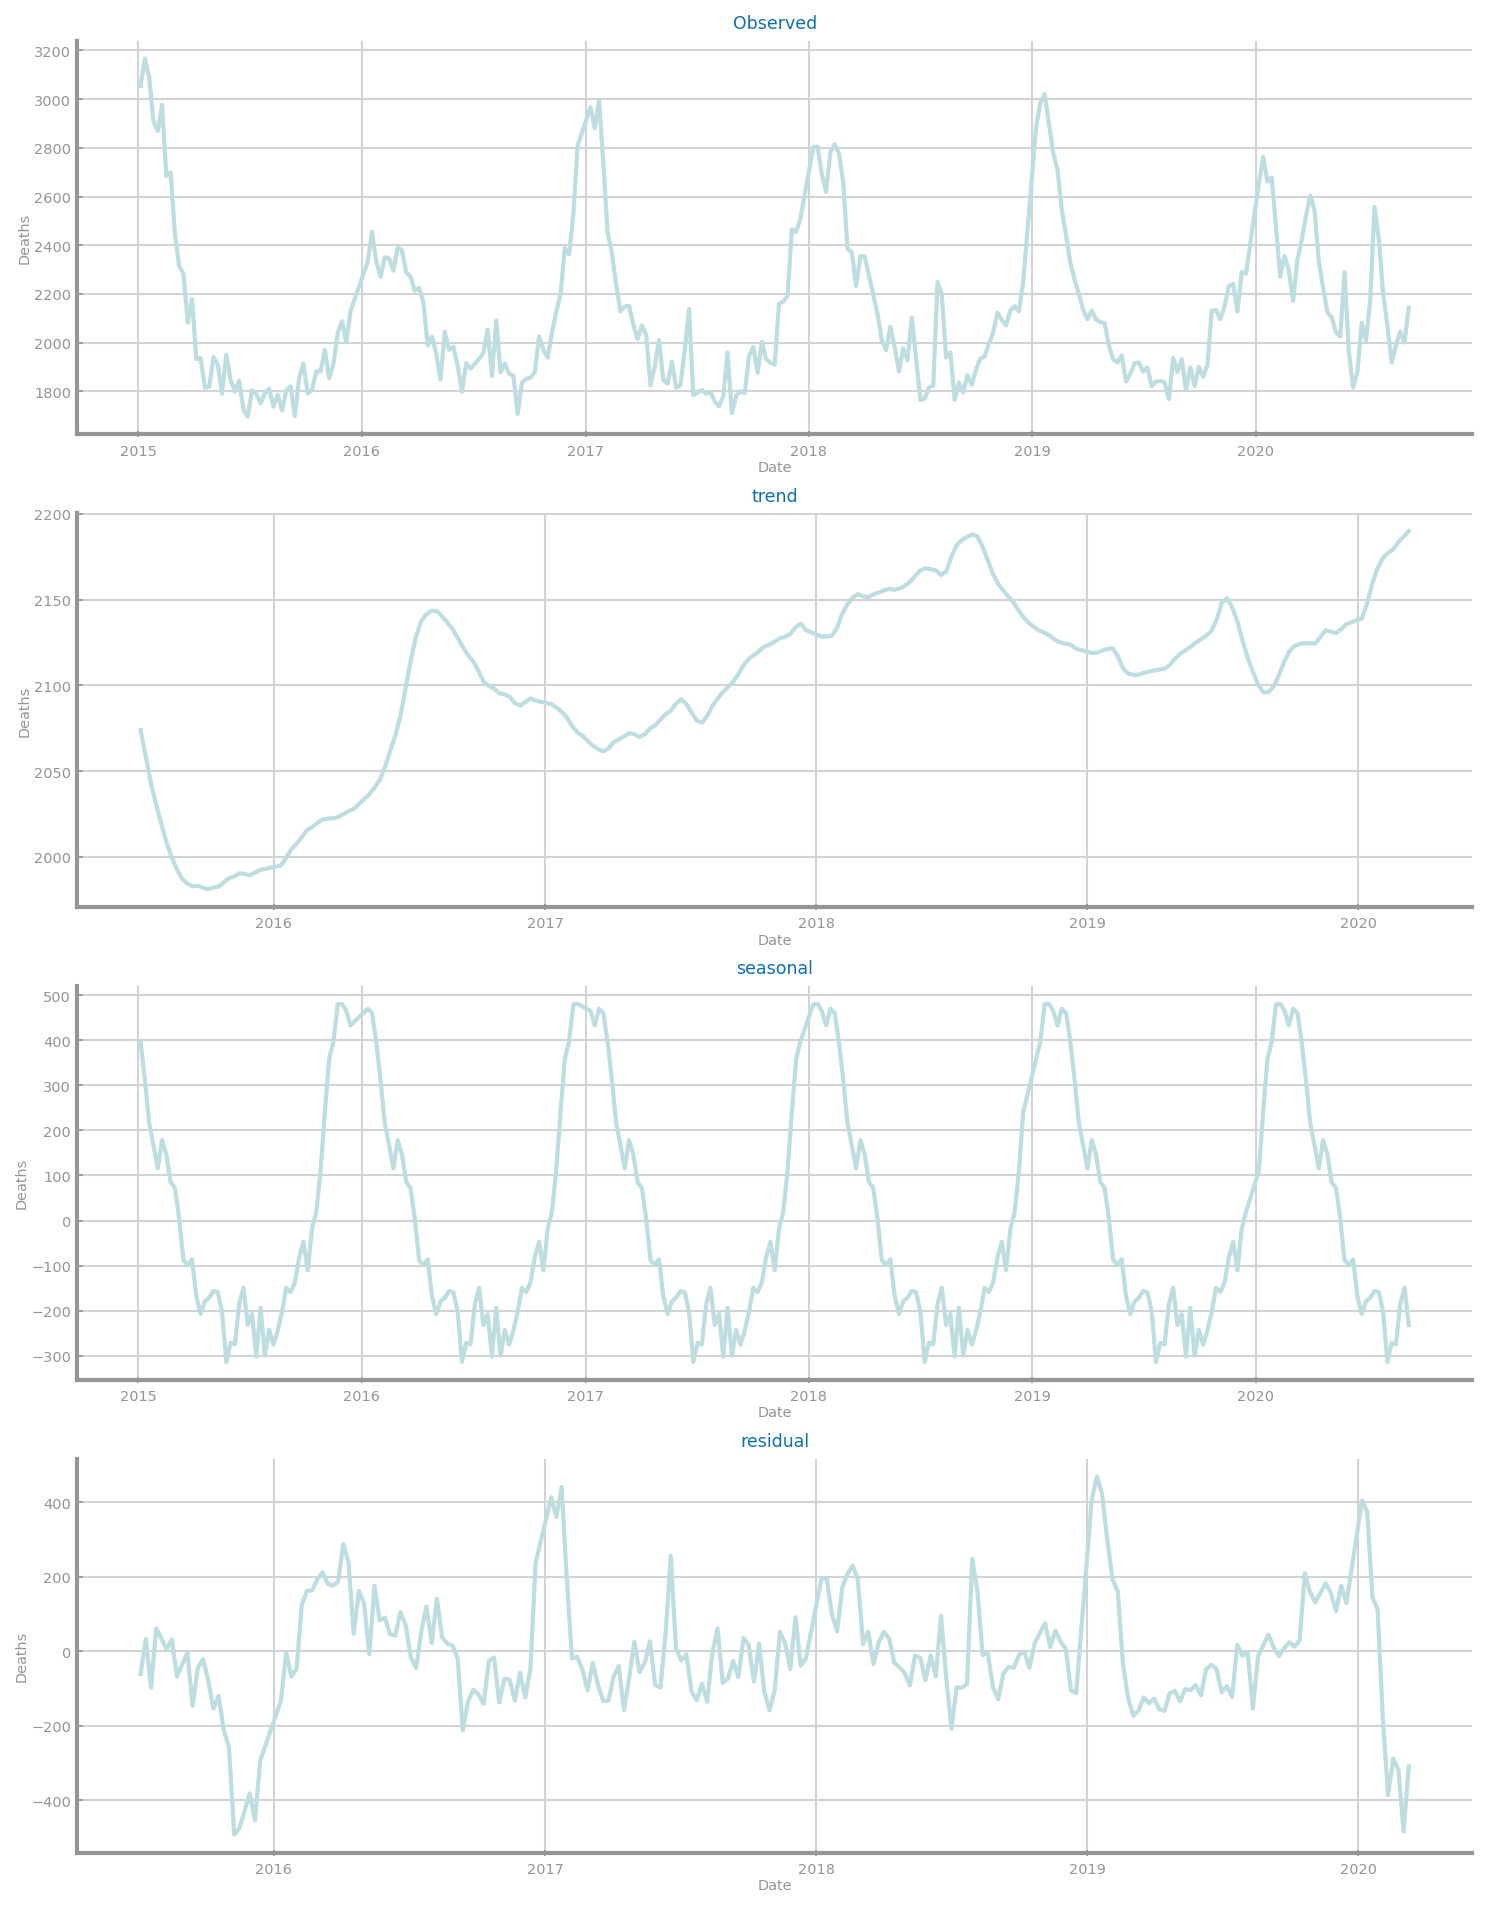

In [20]:
FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2
decomposition = seasonal.seasonal_decompose(data_d, model = "add",  period=52)
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data_d, decomposition, x_label='Date', y_label='Deaths')
plt.show()

# ARIMA

C:\Users\LK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\LK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


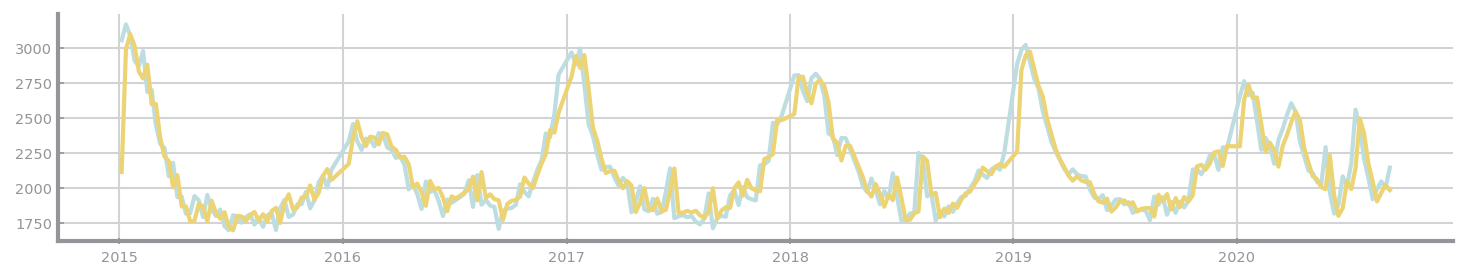

In [38]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = data
model = ARIMA(df, order=(2,0,2))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(df)
plt.plot(results.fittedvalues)
plt.show()

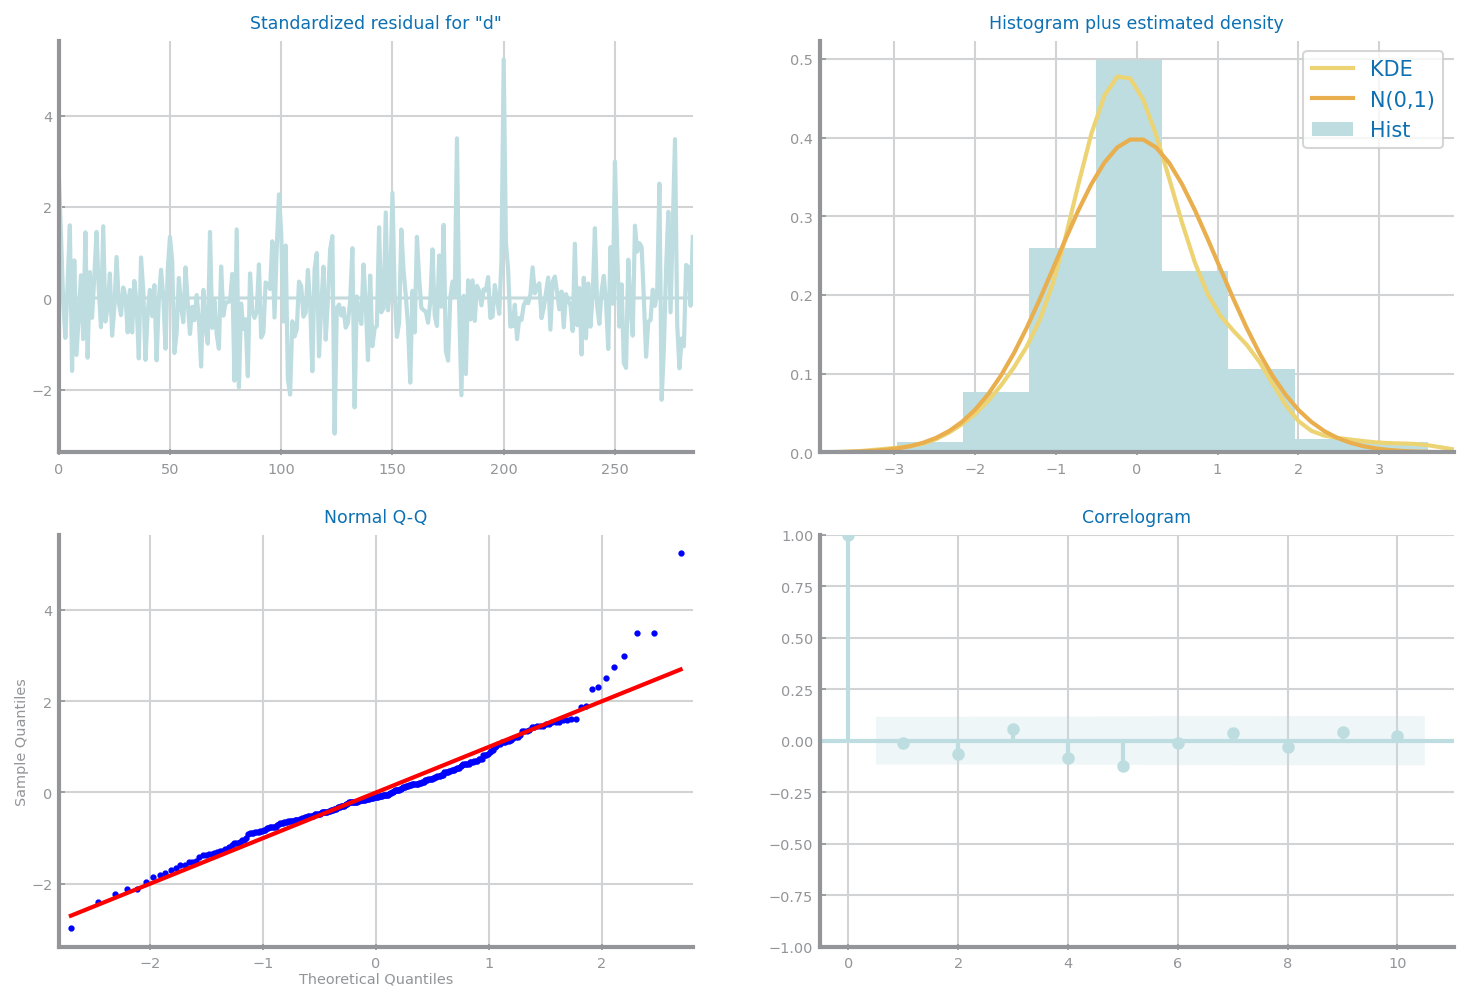

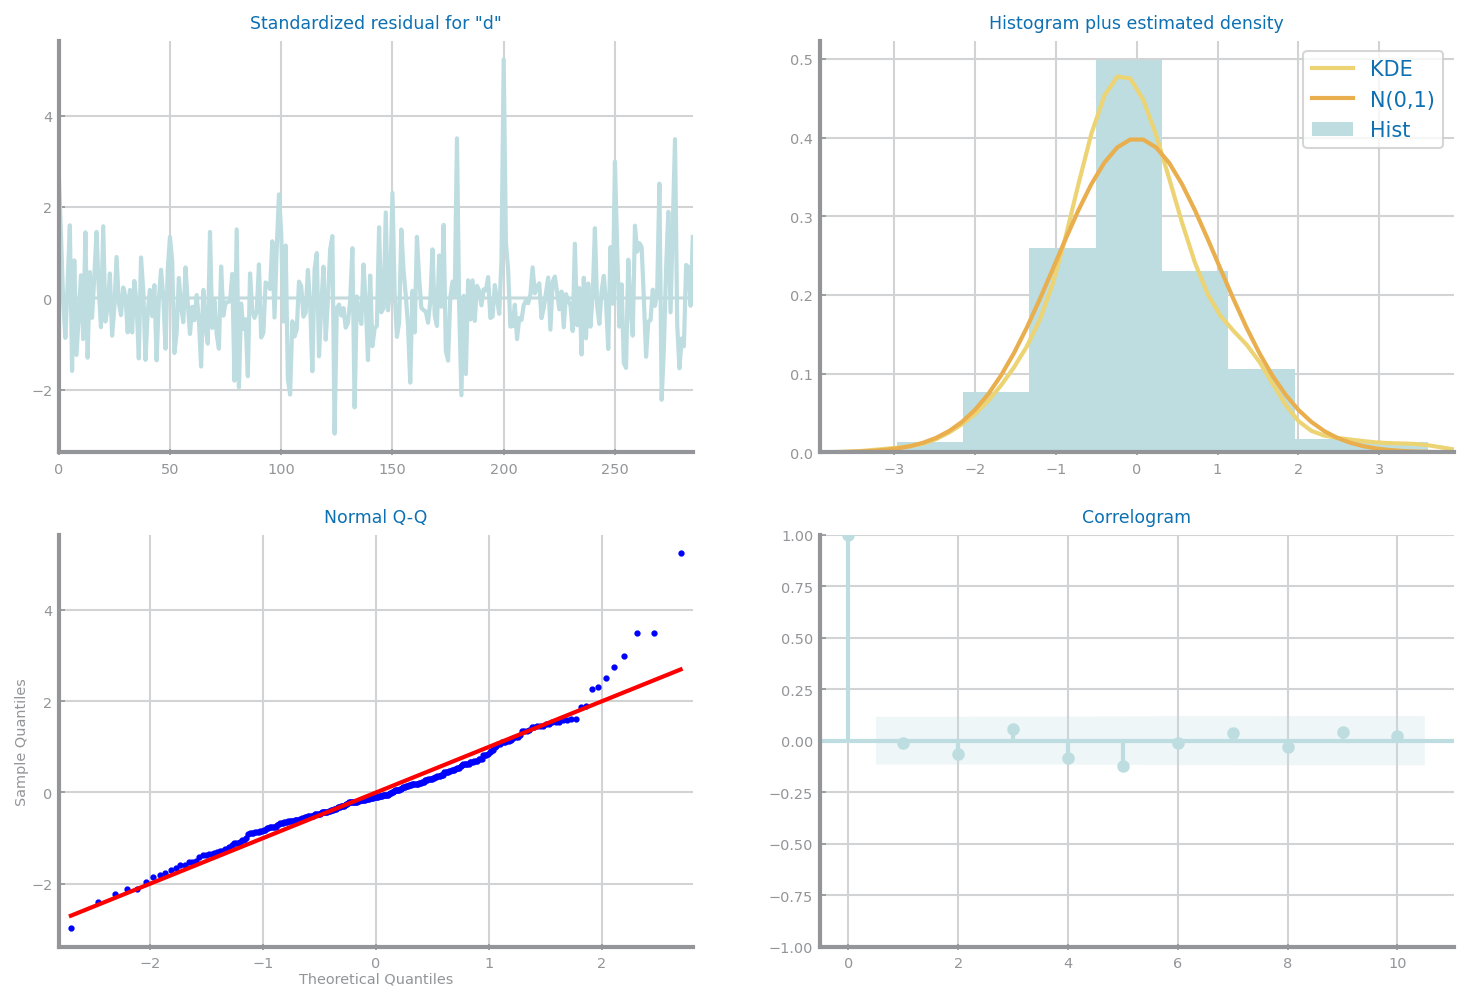

In [39]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

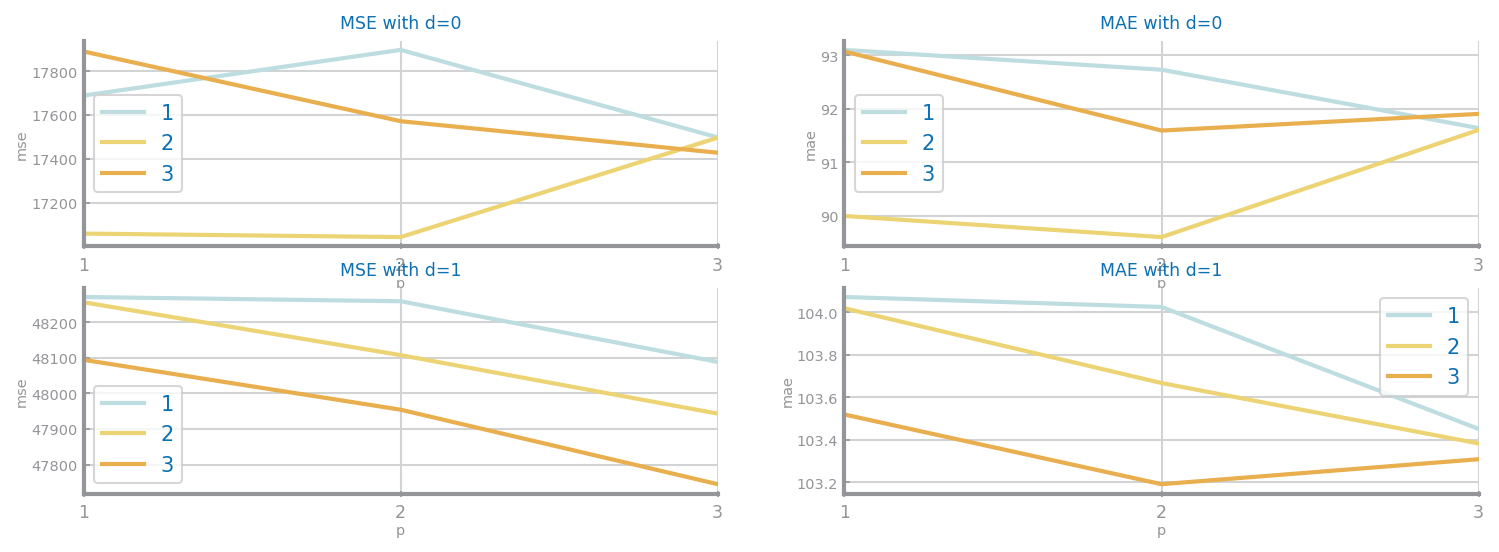

In [42]:
_, axs = plt.subplots(2, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3)
for d in (0, 1):
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(df, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

In [45]:
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

p, d, q = 2, 1, 2
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

ValueError: Date ordinal -36613.9 converts to -100-10-03T02:24:00.000000 (using epoch 0000-12-31T00:00:00), but Matplotlib dates must be between year 0001 and 9999.